In [1]:
import pandas as pd
import numpy as np
import os
import time

# load dataset
df = pd.read_csv(r"C:\\Users\\Frank\\Desktop\\DAT_490_Capstone\\Methodlogy\\Data_Tables\\Final_Cleaned_Promoted\\final_batting_cleaned.csv", low_memory=False)

# define features
features = ['OBP', 'SLG', 'OPS', 'ISO', '2B', 'HR', 'RBI', 'SO', 'SB', 'HR/FB', 
            'LD%', 'Pull%', 'GB/FB', 'wRC', 'wRC+', 'wRAA', 'wOBA']

print(f"Original dataset shape: {df.shape}")
print(f"Number of unique players: {df['PlayerId'].nunique()}")
print(f"Number of features to be transformed: {len(features)}")

# sort by player and season
df = df.sort_values(['PlayerId', 'Season'])

# list to store player records
player_records = []

# get total number players
total_players = df['PlayerId'].nunique()
print(f"\nProcessing {total_players} players...")

# track progress
start_time = time.time()
progress_interval = max(1, total_players // 20)  # Report progress at 5% intervals
processed_count = 0

# process players
for player_id in df['PlayerId'].unique():
    # Get all seasons
    player_data = df[df['PlayerId'] == player_id].sort_values('Season')
    
    # create base record
    player_record = {
        'PlayerId': player_id,
        'Name': player_data['Name'].iloc[0],
        'promoted_major': player_data['promoted_major'].iloc[0],
        'num_seasons': len(player_data)
    }
    
    # add each seasons data
    for i, (_, season) in enumerate(player_data.iterrows(), 1):
        # Add season number and metadata
        player_record[f'Season_{i}'] = season['Season']
        player_record[f'Age_{i}'] = season['Age']
        player_record[f'Level_{i}'] = season['Level']
        player_record[f'Team_{i}'] = season['Team']
        
        # add all performance features
        for feature in features:
            player_record[f'{feature}_{i}'] = season[feature]
    
    # add the record to the list
    player_records.append(player_record)
    
    # update progress
    processed_count += 1
    if processed_count % progress_interval == 0 or processed_count == total_players:
        elapsed_time = time.time() - start_time
        percent_complete = (processed_count / total_players) * 100
        players_per_second = processed_count / max(1, elapsed_time)
        est_remaining = (total_players - processed_count) / max(1, players_per_second)
        
        print(f"Processed {processed_count}/{total_players} players ({percent_complete:.1f}%) - "
              f"Elapsed: {elapsed_time:.1f}s, Est. remaining: {est_remaining:.1f}s")

print("\nCreating DataFrame")
player_df = pd.DataFrame(player_records)

print(f"Creating empty columns for players.")
# calculate total iterations
total_players_to_pad = player_df[player_df['num_seasons'] < max_seasons].shape[0]
progress_interval_pad = max(1, total_players_to_pad // 10)
processed_pad = 0

# create empty columns for fewer seasons
pad_start_time = time.time()
for player_idx, player in player_df.iterrows():
    num_seasons = player['num_seasons']
    
    if num_seasons < max_seasons:
        for i in range(num_seasons + 1, max_seasons + 1):
            player_df.loc[player_idx, f'Season_{i}'] = np.nan
            player_df.loc[player_idx, f'Age_{i}'] = np.nan
            player_df.loc[player_idx, f'Level_{i}'] = np.nan
            player_df.loc[player_idx, f'Team_{i}'] = np.nan
            
            for feature in features:
                player_df.loc[player_idx, f'{feature}_{i}'] = np.nan
        
        # update progress
        processed_pad += 1
        if processed_pad % progress_interval_pad == 0 or processed_pad == total_players_to_pad:
            pad_elapsed = time.time() - pad_start_time
            pad_percent = (processed_pad / total_players_to_pad) * 100
            print(f"Padded {processed_pad}/{total_players_to_pad} players ({pad_percent:.1f}%)")

# summary statistics
print(f"\nWide format dataset shape: {player_df.shape}")
print(f"Number of rows reduced from {len(df)} to {len(player_df)}")
print(f"Number of columns increased from {df.shape[1]} to {player_df.shape[1]}")

# distribution of seasons
season_counts = player_df['num_seasons'].value_counts().sort_index()
print("\nDistribution of seasons by player:")
for seasons, count in season_counts.items():
    print(f"{seasons} season(s): {count} players ({count/len(player_df)*100:.1f}%)")

# percentage of players promoted
promotion_rate = player_df['promoted_major'].mean() * 100
print(f"\nPercentage of players promoted to MLB: {promotion_rate:.1f}%")

print("\nSave Dataset")
# save wide-format
output_path = r"C:\\Users\\Frank\\Desktop\\DAT_490_Capstone\\Methodlogy\\Data_Tables\\batters_final_cleaned_wide.csv"
player_df.to_csv(output_path, index=False)
print(f"Wide-format dataset saved to: {output_path}")

# check sample player
print("\nExample player with 3 seasons:")
sample_player = player_df[player_df['num_seasons'] == 3].iloc[0]

# display selected columns
display_cols = ['PlayerId', 'Name', 'promoted_major', 'num_seasons']
for i in range(1, 4):
    display_cols.extend([f'Season_{i}', f'Age_{i}', f'Level_{i}', f'OBP_{i}', f'SLG_{i}', f'OPS_{i}'])

print(sample_player[display_cols].to_dict())

# show total time for future estimation
total_time = time.time() - start_time
print(f"\nTotal processing time: {total_time:.1f} seconds ({total_time/60:.1f} minutes)")

Original dataset shape: (104728, 54)
Number of unique players: 20008
Number of features to be transformed: 17

Processing 20008 players...
Processed 1000/20008 players (5.0%) - Elapsed: 7.1s, Est. remaining: 134.5s
Processed 2000/20008 players (10.0%) - Elapsed: 14.1s, Est. remaining: 127.3s
Processed 3000/20008 players (15.0%) - Elapsed: 21.1s, Est. remaining: 119.4s
Processed 4000/20008 players (20.0%) - Elapsed: 28.0s, Est. remaining: 112.0s
Processed 5000/20008 players (25.0%) - Elapsed: 34.9s, Est. remaining: 104.8s
Processed 6000/20008 players (30.0%) - Elapsed: 41.8s, Est. remaining: 97.6s
Processed 7000/20008 players (35.0%) - Elapsed: 48.8s, Est. remaining: 90.8s
Processed 8000/20008 players (40.0%) - Elapsed: 55.8s, Est. remaining: 83.7s
Processed 9000/20008 players (45.0%) - Elapsed: 62.7s, Est. remaining: 76.7s
Processed 10000/20008 players (50.0%) - Elapsed: 69.6s, Est. remaining: 69.6s
Processed 11000/20008 players (55.0%) - Elapsed: 76.3s, Est. remaining: 62.5s
Processed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in data
file_path = r"C:\\Users\\Frank\\Desktop\\DAT_490_Capstone\\Methodlogy\\Data_Tables\\batters_final_cleaned_wide.csv"
print("Reading CSV")
df_wide = pd.read_csv(file_path, low_memory=False)

print(f"DataFrame shape: {df_wide.shape}")
print(f"Number of players: {len(df_wide)}")
print(f"Number of features: {df_wide.shape[1]}")

# create slice for inspection
df_slice = df_wide.iloc[:4000].copy()
print(f"\nSlice shape: {df_slice.shape}")

# save the slice
slice_path = r"C:\\Users\\Frank\\Desktop\\DAT_490_Capstone\\Methodlogy\\Data_Tables\\batters_final_cleaned_wide_slice.csv"
df_slice.to_csv(slice_path, index=False)
print(f"Slice saved to: {slice_path}")

print("\n DATA INSPECTION")

print("\Stats:")
print(f"Promotion rate: {df_wide['promoted_major'].mean():.2%}")
print(f"Average number of seasons: {df_wide['num_seasons'].mean():.2f}")

# check missing values
missing_data = df_wide.isnull().sum()
print(f"\nNumber of features with missing values: {sum(missing_data > 0)}")
print(f"These are expected due to varying number of seasons per player.")

# check examples
print("\nExample player with 1 season:")
player_1_season = df_wide[df_wide['num_seasons'] == 1].iloc[0]
cols_1 = ['PlayerId', 'Name', 'promoted_major', 'num_seasons', 'Season_1', 'Age_1', 'Level_1', 'OBP_1', 'SLG_1', 'OPS_1']
print(player_1_season[cols_1].to_dict())

print("\nExample player with 5 seasons:")
player_5_seasons = df_wide[df_wide['num_seasons'] == 5].iloc[0]
cols_5 = ['PlayerId', 'Name', 'promoted_major', 'num_seasons'] + [f'Season_{i}' for i in range(1, 6)]
print(player_5_seasons[cols_5].to_dict())

# look at a promoted player
promoted_player = df_wide[df_wide['promoted_major'] == 1].iloc[0]
print("\nExample promoted player:")
print({'PlayerId': promoted_player['PlayerId'], 
      'Name': promoted_player['Name'], 
      'promoted_major': promoted_player['promoted_major'],
      'num_seasons': promoted_player['num_seasons']})



Reading wide format CSV...
DataFrame shape: (20008, 949)
Number of players: 20008
Number of features: 949

Slice shape: (4000, 949)
Slice saved to: C:\\Users\\Frank\\Desktop\\DAT_490_Capstone\\Methodlogy\\Data_Tables\\batters_final_cleaned_wide_slice.csv

--- DATA INSPECTION ---

Basic statistics:
Promotion rate: 2.02%
Average number of seasons: 5.23

Number of features with missing values: 924
These are expected due to varying number of seasons per player.

Example of a player with 1 season:
{'PlayerId': '10021', 'Name': 'Mike Minor', 'promoted_major': 0.0, 'num_seasons': 1, 'Season_1': 2011, 'Age_1': 23.0, 'Level_1': 'AAA', 'OBP_1': 0.375, 'SLG_1': 0.375, 'OPS_1': 0.75}

Example of a player with 5 seasons:
{'PlayerId': '10039', 'Name': 'Keyvius Sampson', 'promoted_major': 0.0, 'num_seasons': 5, 'Season_1': 2013, 'Season_2': 2013.0, 'Season_3': 2014.0, 'Season_4': 2017.0, 'Season_5': 2017.0}

Example of a promoted player:
{'PlayerId': '1002', 'Name': 'Aramis Ramirez', 'promoted_major'

In [5]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 6.3 MB/s eta 0:01:00
   ---------------------------------------- 2.4/376.0 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 2.9/376.0 MB 5.2 MB/s eta 0:01:12
   ---------------------------------------- 3.4/376.0 MB 4.4 MB/s eta 0:01:26
   ---------------------------------------- 4.5/376.0 MB 4.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.utils import class_weight
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import os

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# read in data
print("Read CSV")
file_path = r"C:\Users\Frank\Desktop\DAT_490_Capstone\Methodlogy\Data_Tables\batters_final_cleaned_wide.csv"
df = pd.read_csv(file_path, low_memory=False)

print(f"Dataset shape: {df.shape}")
print(f"Number of players: {len(df)}")
print(f"Promotion rate: {df['promoted_major'].mean():.2%}")

# define target and features
target = 'promoted_major'
features_base = ['OBP', 'SLG', 'OPS', 'ISO', '2B', 'HR', 'RBI', 'SO', 'SB', 'HR/FB', 
                'LD%', 'Pull%', 'GB/FB', 'wRC', 'wRC+', 'wRAA', 'wOBA']

# Extract  number of seasons per player
season_counts = df['num_seasons'].value_counts().sort_index()
print("\nDistribution of seasons per player:")
for seasons, count in season_counts.items():
    print(f"{seasons} season(s): {count} players ({count/len(df)*100:.1f}%)")

print("\nFeature engineering")

# create DataFrame
engineered_features = pd.DataFrame(index=df.index)

# player identifier / target variable
engineered_features['PlayerId'] = df['PlayerId']
engineered_features['promoted_major'] = df['promoted_major']

# create aggregated features acros season
def create_aggregated_features(row, feature):
    # get all values for feature
    values = []
    for i in range(1, int(row['num_seasons']) + 1):
        col_name = f"{feature}_{i}"
        if col_name in row and not pd.isna(row[col_name]):
            values.append(row[col_name])
    
    # calculate stats
    if values:
        return {
            f"{feature}_mean": np.mean(values),
            f"{feature}_max": np.max(values),
            f"{feature}_last": values[-1],
            f"{feature}_improvement": values[-1] - values[0] if len(values) > 1 else 0
        }
    else:
        return {
            f"{feature}_mean": np.nan,
            f"{feature}_max": np.nan,
            f"{feature}_last": np.nan,
            f"{feature}_improvement": np.nan
        }

# process player
print("Aggregated features for each player")
for idx, row in df.iterrows():
    if idx % 1000 == 0:
        print(f"Processing player {idx}/{len(df)}...")
    
    # num seasons feature
    engineered_features.loc[idx, 'num_seasons'] = row['num_seasons']
    
    # look at highest level
    max_level = None
    highest_level_value = -1
    level_mapping = {'A': 1, 'A+': 2, 'AA': 3, 'AAA': 4}
    
    for i in range(1, int(row['num_seasons']) + 1):
        level = row.get(f'Level_{i}')
        if isinstance(level, str) and level in level_mapping:
            if level_mapping[level] > highest_level_value:
                highest_level_value = level_mapping[level]
                max_level = level
    
    engineered_features.loc[idx, 'max_level'] = max_level
    
    # aggregate features for performance metrics
    for feature in features_base:
        feature_stats = create_aggregated_features(row, feature)
        for stat_name, stat_value in feature_stats.items():
            engineered_features.loc[idx, stat_name] = stat_value

# drop NaN values if left
print(f"Shape before dropping NaN values: {engineered_features.shape}")
engineered_features = engineered_features.dropna()
print(f"Shape after dropping NaN values: {engineered_features.shape}")


print("\n Data modeling")

# convert categorical features to dummy variables
if 'max_level' in engineered_features.columns:
    engineered_features = pd.get_dummies(engineered_features, columns=['max_level'], drop_first=True)

# get feature names
X_columns = [col for col in engineered_features.columns if col not in ['PlayerId', 'promoted_major']]
print(f"Number of features: {len(X_columns)}")

# split data
X = engineered_features[X_columns]
y = engineered_features['promoted_major']

# split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Promotion rate in training set: {y_train.mean():.2%}")
print(f"Promotion rate in testing set: {y_test.mean():.2%}")

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"Class weights: {class_weight_dict}")

# build / compile MLP model
print("\nBuilding neural network")

def create_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        # input layer
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        # first hidden layer
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        # second hidden layer
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        # output layer
        Dense(1, activation='sigmoid')
    ])
    
    # compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    
    return model

# create model
model = create_model(input_dim=X_train_scaled.shape[1], learning_rate=0.001)
model.summary()

# set up callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# reduce learning rate if plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# model checkpoint to check model
checkpoint = ModelCheckpoint(
    'best_mlp_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# train model
print("\nTraining model")
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

# evaluate model
print("\nEvaluating the model")
# Load the best model
model.load_weights('best_mlp_model.h5')

# evaluate test set
test_results = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test loss: {test_results[0]:.4f}")
print(f"Test accuracy: {test_results[1]:.4f}")
print(f"Test AUC: {test_results[2]:.4f}")
print(f"Test precision: {test_results[3]:.4f}")
print(f"Test recall: {test_results[4]:.4f}")

# make prediction
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# performance metrics
print("\n Performance Metrics:")
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('roc_curve.png')
plt.close()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.savefig('precision_recall_curve.png')
plt.close()

# training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_history.png')
plt.close()

# feature importance
print("\n Feature importance...")

class TFModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        return self
        
    def predict(self, X):
        # binary predictors
        return (self.model.predict(X) > 0.5).astype(int).flatten()

# wrapper
model_wrapper = TFModelWrapper(model)

# permutation importance with estimator
result = permutation_importance(
    model_wrapper, 
    X_test_scaled, 
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)

# feature importance
importance = result.importances_mean
indices = np.argsort(importance)[::-1]

# plot feature importance
feature_names = X.columns
plt.figure(figsize=(12, 8))
plt.barh(range(min(20, len(indices))), importance[indices[:20]], align='center')
plt.yticks(range(min(20, len(indices))), [feature_names[i] for i in indices[:20]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print("\nMost Important Features:")
for i in range(min(10, len(indices))):
    print(f"{feature_names[indices[i]]}: {importance[indices[i]]:.4f}")

print("\nTraining final model ")

final_model = create_model(
    input_dim=X_train_scaled.shape[1],
    learning_rate=0.001,
    dropout_rate=0.3
)

final_history = final_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

# save final model
final_model.save('mlb_promotion_mlp_model.h5')
print("Final model saved as 'mlb_promotion_mlp_model.h5'")

# final summary
print("\n=== SUMMARY ===")
print(f"Model Architecture: MLP with 3 hidden layers (128, 64, 32 neurons)")
print(f"Total parameters: {final_model.count_params()}")
print(f"Final test accuracy: {test_results[1]:.4f}")
print(f"AUC-ROC score: {test_results[2]:.4f}")
print(f"Precision: {test_results[3]:.4f}")
print(f"Recall: {test_results[4]:.4f}")
print(f"F1 Score: {2 * (test_results[3] * test_results[4]) / (test_results[3] + test_results[4]):.4f}")

print("\nKey performance metrics are saved check directory")
print("Feature importance analysis is saved check directory")
print("\nModel successfully trained and evaluated!")

Read CSV
Dataset shape: (20008, 949)
Number of players: 20008
Promotion rate: 2.02%

Distribution of seasons per player:
1 season(s): 3669 players (18.3%)
2 season(s): 3352 players (16.8%)
3 season(s): 2629 players (13.1%)
4 season(s): 1914 players (9.6%)
5 season(s): 1422 players (7.1%)
6 season(s): 1141 players (5.7%)
7 season(s): 870 players (4.3%)
8 season(s): 878 players (4.4%)
9 season(s): 843 players (4.2%)
10 season(s): 741 players (3.7%)
11 season(s): 593 players (3.0%)
12 season(s): 417 players (2.1%)
13 season(s): 317 players (1.6%)
14 season(s): 282 players (1.4%)
15 season(s): 215 players (1.1%)
16 season(s): 188 players (0.9%)
17 season(s): 137 players (0.7%)
18 season(s): 100 players (0.5%)
19 season(s): 68 players (0.3%)
20 season(s): 61 players (0.3%)
21 season(s): 32 players (0.2%)
22 season(s): 35 players (0.2%)
23 season(s): 20 players (0.1%)
24 season(s): 13 players (0.1%)
25 season(s): 21 players (0.1%)
26 season(s): 7 players (0.0%)
27 season(s): 9 players (0.0%)

C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         9,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,609 (80.50 KB)

 Trainable params: 20,161 (78.75 KB)

 Non-trainable params: 448 (1.75 KB)


Training model
Epoch 1/100
205/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5459 - auc_3: 0.6997 - loss: 0.7468 - precision_3: 0.0539 - recall_3: 0.7401             
Epoch 1: val_loss improved from inf to 0.50262, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5497 - auc_3: 0.7063 - loss: 0.7372 - precision_3: 0.0545 - recall_3: 0.7471 - val_accuracy: 0.7956 - val_auc_3: 0.9068 - val_loss: 0.5026 - val_precision_3: 0.1144 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 2/100
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - auc_3: 0.8539 - loss: 0.5106 - precision_3: 0.0940 - recall_3: 0.8622             
Epoch 2: val_loss improved from 0.50262 to 0.42409, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7133 - auc_3: 0.8542 - loss: 0.5100 - precision_3: 0.0940 - recall_3: 0.8624 - val_accuracy: 0.8255 - val_auc_3: 0.9116 - val_loss: 0.4241 - val_precision_3: 0.1339 - val_recall_3: 0.8868 - learning_rate: 0.0010
Epoch 3/100
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - auc_3: 0.8755 - loss: 0.4649 - precision_3: 0.1139 - recall_3: 0.8448             
Epoch 3: val_loss improved from 0.42409 to 0.41740, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - auc_3: 0.8761 - loss: 0.4636 - precision_3: 0.1138 - recall_3: 0.8448 - val_accuracy: 0.8412 - val_auc_3: 0.9133 - val_loss: 0.4174 - val_precision_3: 0.1455 - val_recall_3: 0.8868 - learning_rate: 0.0010
Epoch 4/100
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - auc_3: 0.9124 - loss: 0.3870 - precision_3: 0.1397 - recall_3: 0.8730             
Epoch 4: val_loss improved from 0.41740 to 0.38515, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - auc_3: 0.9127 - loss: 0.3864 - precision_3: 0.1394 - recall_3: 0.8733 - val_accuracy: 0.8440 - val_auc_3: 0.9192 - val_loss: 0.3851 - val_precision_3: 0.1433 - val_recall_3: 0.8491 - learning_rate: 0.0010
Epoch 5/100
209/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - auc_3: 0.9154 - loss: 0.3741 - precision_3: 0.1461 - recall_3: 0.8866             
Epoch 5: val_loss did not improve from 0.38515
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - auc_3: 0.9159 - loss: 0.3731 - precision_3: 0.1457 - recall_3: 0.8869 - val_accuracy: 0.8390 - val_auc_3: 0.9206 - val_loss: 0.3861 - val_precision_3: 0.1437 - val_recall_3: 0.8868 - learning_rate: 0.0010
Epoch 6/100
205/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - auc_3: 0.9237 - loss: 0.3468 - precision_3: 0.1545 - recall_3: 0.9040             
Epoch 6: val_loss improved from 0.38515 to 0.35874, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - auc_3: 0.9239 - loss: 0.3467 - precision_3: 0.1536 - recall_3: 0.9026 - val_accuracy: 0.8435 - val_auc_3: 0.9178 - val_loss: 0.3587 - val_precision_3: 0.1473 - val_recall_3: 0.8868 - learning_rate: 0.0010
Epoch 7/100
213/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - auc_3: 0.9277 - loss: 0.3374 - precision_3: 0.1561 - recall_3: 0.9010             
Epoch 7: val_loss improved from 0.35874 to 0.35695, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - auc_3: 0.9279 - loss: 0.3370 - precision_3: 0.1556 - recall_3: 0.9004 - val_accuracy: 0.8485 - val_auc_3: 0.9195 - val_loss: 0.3569 - val_precision_3: 0.1516 - val_recall_3: 0.8868 - learning_rate: 0.0010
Epoch 8/100
200/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - auc_3: 0.9289 - loss: 0.3337 - precision_3: 0.1590 - recall_3: 0.9059             
Epoch 8: val_loss improved from 0.35695 to 0.33949, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - auc_3: 0.9296 - loss: 0.3322 - precision_3: 0.1582 - recall_3: 0.9053 - val_accuracy: 0.8559 - val_auc_3: 0.9107 - val_loss: 0.3395 - val_precision_3: 0.1559 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 9/100
220/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - auc_3: 0.9373 - loss: 0.3064 - precision_3: 0.1693 - recall_3: 0.9225             
Epoch 9: val_loss improved from 0.33949 to 0.29246, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8439 - auc_3: 0.9374 - loss: 0.3062 - precision_3: 0.1692 - recall_3: 0.9226 - val_accuracy: 0.8699 - val_auc_3: 0.9083 - val_loss: 0.2925 - val_precision_3: 0.1704 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 10/100
214/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - auc_3: 0.9374 - loss: 0.3116 - precision_3: 0.1703 - recall_3: 0.8655             
Epoch 10: val_loss did not improve from 0.29246
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - auc_3: 0.9377 - loss: 0.3109 - precision_3: 0.1701 - recall_3: 0.8671 - val_accuracy: 0.8615 - val_auc_3: 0.9038 - val_loss: 0.3148 - val_precision_3: 0.1614 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 11/100
217/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - auc_3: 0.9419 - loss: 0.2923 - precision_3: 0.1728 - recall_3: 0.9035             
Epoch 11: val_loss improved from 0.29246 to 0.28691, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8491 - auc_3: 0.9420 - loss: 0.2922 - precision_3: 0.1725 - recall_3: 0.9036 - val_accuracy: 0.8649 - val_auc_3: 0.9076 - val_loss: 0.2869 - val_precision_3: 0.1600 - val_recall_3: 0.8302 - learning_rate: 0.0010
Epoch 12/100
217/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - auc_3: 0.9441 - loss: 0.2835 - precision_3: 0.1875 - recall_3: 0.9291             
Epoch 12: val_loss improved from 0.28691 to 0.26935, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - auc_3: 0.9443 - loss: 0.2832 - precision_3: 0.1872 - recall_3: 0.9291 - val_accuracy: 0.8812 - val_auc_3: 0.9092 - val_loss: 0.2694 - val_precision_3: 0.1789 - val_recall_3: 0.8302 - learning_rate: 0.0010
Epoch 13/100
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - auc_3: 0.9486 - loss: 0.2656 - precision_3: 0.1905 - recall_3: 0.9412             
Epoch 13: val_loss did not improve from 0.26935
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - auc_3: 0.9488 - loss: 0.2653 - precision_3: 0.1904 - recall_3: 0.9415 - val_accuracy: 0.8711 - val_auc_3: 0.9083 - val_loss: 0.2891 - val_precision_3: 0.1692 - val_recall_3: 0.8491 - learning_rate: 0.0010
Epoch 14/100
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - auc_3: 0.9493 - loss: 0.2683 - precision_3: 0.1866 - recall_3: 0.9079             
Epoch 14: val_loss did not improve from 0.26935
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - auc_3: 0.9555 - loss: 0.2402 - precision_3: 0.2086 - recall_3: 0.9566 - val_accuracy: 0.8789 - val_auc_3: 0.9051 - val_loss: 0.2600 - val_precision_3: 0.1811 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 18/100
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - auc_3: 0.9556 - loss: 0.2420 - precision_3: 0.2058 - recall_3: 0.9326             
Epoch 18: val_loss did not improve from 0.26005
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8752 - auc_3: 0.9557 - loss: 0.2421 - precision_3: 0.2054 - recall_3: 0.9328 - val_accuracy: 0.8778 - val_auc_3: 0.9057 - val_loss: 0.2700 - val_precision_3: 0.1772 - val_recall_3: 0.8491 - learning_rate: 0.0010
Epoch 19/100
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - auc_3: 0.9564 - loss: 0.2365 - precision_3: 0.2131 - recall_3: 0.9699             
Epoch 19: val_loss improved from 0.26005 to 0.25246, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - auc_3: 0.9568 - loss: 0.2358 - precision_3: 0.2128 - recall_3: 0.9696 - val_accuracy: 0.8874 - val_auc_3: 0.9045 - val_loss: 0.2525 - val_precision_3: 0.1925 - val_recall_3: 0.8679 - learning_rate: 0.0010
Epoch 20/100
213/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8830 - auc_3: 0.9598 - loss: 0.2253 - precision_3: 0.2174 - recall_3: 0.9338             
Epoch 20: val_loss did not improve from 0.25246
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - auc_3: 0.9599 - loss: 0.2254 - precision_3: 0.2167 - recall_3: 0.9340 - val_accuracy: 0.8857 - val_auc_3: 0.9237 - val_loss: 0.2635 - val_precision_3: 0.1875 - val_recall_3: 0.8491 - learning_rate: 0.0010
Epoch 21/100
208/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8825 - auc_3: 0.9599 - loss: 0.2323 - precision_3: 0.2157 - recall_3: 0.9286             
Epoch 21: val_loss did not improve from 0.25246
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8803 - auc_3: 0.9591 - loss: 0.2341 - precision_3: 0.2141 - recall_3: 0.9456 - val_accuracy: 0.9082 - val_auc_3: 0.9059 - val_loss: 0.2039 - val_precision_3: 0.2105 - val_recall_3: 0.7547 - learning_rate: 0.0010
Epoch 23/100
209/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8965 - auc_3: 0.9645 - loss: 0.2065 - precision_3: 0.2421 - recall_3: 0.9448             
Epoch 23: val_loss did not improve from 0.20392
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - auc_3: 0.9645 - loss: 0.2070 - precision_3: 0.2401 - recall_3: 0.9443 - val_accuracy: 0.9043 - val_auc_3: 0.9118 - val_loss: 0.2236 - val_precision_3: 0.2118 - val_recall_3: 0.8113 - learning_rate: 0.0010
Epoch 24/100
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8931 - auc_3: 0.9647 - loss: 0.2095 - precision_3: 0.2328 - recall_3: 0.9376             
Epoch 24: val_loss did not improve from 0.20392
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9057 - auc_3: 0.9756 - loss: 0.1663 - precision_3: 0.2627 - recall_3: 0.9804 - val_accuracy: 0.9099 - val_auc_3: 0.9096 - val_loss: 0.2035 - val_precision_3: 0.2108 - val_recall_3: 0.7358 - learning_rate: 5.0000e-04
Epoch 30/100
214/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - auc_3: 0.9715 - loss: 0.1829 - precision_3: 0.2643 - recall_3: 0.9609             
Epoch 30: val_loss did not improve from 0.20347
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - auc_3: 0.9717 - loss: 0.1828 - precision_3: 0.2638 - recall_3: 0.9612 - val_accuracy: 0.9077 - val_auc_3: 0.9148 - val_loss: 0.2199 - val_precision_3: 0.2154 - val_recall_3: 0.7925 - learning_rate: 5.0000e-04
Epoch 31/100
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - auc_3: 0.9746 - loss: 0.1674 - precision_3: 0.2673 - recall_3: 0.9791             
Epoch 31: val_loss improved from 0.20347 to 0.19020, saving model to best_mlp_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - auc_3: 0.9748 - loss: 0.1671 - precision_3: 0.2673 - recall_3: 0.9790 - val_accuracy: 0.9212 - val_auc_3: 0.9014 - val_loss: 0.1902 - val_precision_3: 0.2229 - val_recall_3: 0.6604 - learning_rate: 5.0000e-04
Epoch 32/100
217/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9198 - auc_3: 0.9753 - loss: 0.1589 - precision_3: 0.2947 - recall_3: 0.9732             
Epoch 32: val_loss did not improve from 0.19020
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - auc_3: 0.9755 - loss: 0.1586 - precision_3: 0.2946 - recall_3: 0.9733 - val_accuracy: 0.9262 - val_auc_3: 0.9043 - val_loss: 0.1916 - val_precision_3: 0.2434 - val_recall_3: 0.6981 - learning_rate: 5.0000e-04
Epoch 33/100
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - auc_3: 0.9717 - loss: 0.1754 - precision_3: 0.2940 - recall_3: 0.9530             
Epoch 33: val_loss did not improve from 0.19020
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - auc_3: 0.9815 - loss: 0.1324 - precision_3: 0.3311 - recall_3: 0.9866 - val_accuracy: 0.9324 - val_auc_3: 0.9003 - val_loss: 0.1879 - val_precision_3: 0.2590 - val_recall_3: 0.6792 - learning_rate: 2.5000e-04
Epoch 42/100
197/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9290 - auc_3: 0.9792 - loss: 0.1368 - precision_3: 0.3221 - recall_3: 0.9772             
Epoch 42: val_loss did not improve from 0.18790
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9291 - auc_3: 0.9799 - loss: 0.1364 - precision_3: 0.3210 - recall_3: 0.9777 - val_accuracy: 0.9307 - val_auc_3: 0.9048 - val_loss: 0.1937 - val_precision_3: 0.2535 - val_recall_3: 0.6792 - learning_rate: 2.5000e-04
Epoch 43/100
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - auc_3: 0.9799 - loss: 0.1325 - precision_3: 0.3453 - recall_3: 0.9746             
Epoch 43: val_loss did not improve from 0.18790
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc

C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


198/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5503 - auc_4: 0.6558 - loss: 0.8219 - precision_4: 0.0507 - recall_4: 0.6844             
Epoch 1: val_loss did not improve from 0.18790
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5557 - auc_4: 0.6680 - loss: 0.8048 - precision_4: 0.0518 - recall_4: 0.6971 - val_accuracy: 0.8221 - val_auc_4: 0.9222 - val_loss: 0.5018 - val_precision_4: 0.1317 - val_recall_4: 0.8868 - learning_rate: 0.0010
Epoch 2/100
220/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - auc_4: 0.8734 - loss: 0.4850 - precision_4: 0.1000 - recall_4: 0.8791             
Epoch 2: val_loss did not improve from 0.18790
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7268 - auc_4: 0.8735 - loss: 0.4848 - precision_4: 0.1000 - recall_4: 0.8791 - val_accuracy: 0.8412 - val_auc_4: 0.9194 - val_loss: 0.4509 - val_precision_4: 0.1455 - val_recall_4: 0.8868 - learning_rate: 0.0010
Epoch 3/100
218/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.781

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - auc_4: 0.9648 - loss: 0.2062 - precision_4: 0.2549 - recall_4: 0.9611 - val_accuracy: 0.9324 - val_auc_4: 0.9117 - val_loss: 0.1788 - val_precision_4: 0.2721 - val_recall_4: 0.7547 - learning_rate: 0.0010
Epoch 30/100
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - auc_4: 0.9677 - loss: 0.1886 - precision_4: 0.2791 - recall_4: 0.9625             
Epoch 30: val_loss did not improve from 0.17879
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9139 - auc_4: 0.9680 - loss: 0.1887 - precision_4: 0.2781 - recall_4: 0.9622 - val_accuracy: 0.9195 - val_auc_4: 0.9050 - val_loss: 0.2026 - val_precision_4: 0.2188 - val_recall_4: 0.6604 - learning_rate: 0.0010
Epoch 31/100
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - auc_4: 0.9695 - loss: 0.1958 - precision_4: 0.2636 - recall_4: 0.9117             
Epoch 31: val_loss did not improve from 0.17879
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - auc_4: 0.9799 - loss: 0.1388 - precision_4: 0.3320 - recall_4: 0.9831 - val_accuracy: 0.9358 - val_auc_4: 0.9054 - val_loss: 0.1745 - val_precision_4: 0.2636 - val_recall_4: 0.6415 - learning_rate: 5.0000e-04
Epoch 39/100
206/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9346 - auc_4: 0.9777 - loss: 0.1488 - precision_4: 0.3391 - recall_4: 0.9727             
Epoch 39: val_loss did not improve from 0.17447
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - auc_4: 0.9781 - loss: 0.1484 - precision_4: 0.3381 - recall_4: 0.9734 - val_accuracy: 0.9336 - val_auc_4: 0.8999 - val_loss: 0.1771 - val_precision_4: 0.2400 - val_recall_4: 0.5660 - learning_rate: 5.0000e-04
Epoch 40/100
207/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9348 - auc_4: 0.9764 - loss: 0.1527 - precision_4: 0.3402 - recall_4: 0.9813             
Epoch 40: val_loss did not improve from 0.17447
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - auc_4: 0.9796 - loss: 0.1394 - precision_4: 0.3617 - recall_4: 0.9739 - val_accuracy: 0.9414 - val_auc_4: 0.9037 - val_loss: 0.1608 - val_precision_4: 0.2661 - val_recall_4: 0.5472 - learning_rate: 2.5000e-04
Epoch 46/100
220/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - auc_4: 0.9819 - loss: 0.1245 - precision_4: 0.3532 - recall_4: 0.9918             
Epoch 46: val_loss did not improve from 0.16077
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9382 - auc_4: 0.9820 - loss: 0.1244 - precision_4: 0.3532 - recall_4: 0.9917 - val_accuracy: 0.9403 - val_auc_4: 0.9090 - val_loss: 0.1682 - val_precision_4: 0.2696 - val_recall_4: 0.5849 - learning_rate: 2.5000e-04
Epoch 47/100
206/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9443 - auc_4: 0.9825 - loss: 0.1286 - precision_4: 0.3750 - recall_4: 0.9580             
Epoch 47: val_loss did not improve from 0.16077
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc

Final model saved as 'mlb_promotion_mlp_model.h5'

=== SUMMARY ===
Model Architecture: MLP with 3 hidden layers (128, 64, 32 neurons)
Total parameters: 20609
Final test accuracy: 0.9338
AUC-ROC score: 0.9200
Precision: 0.2829
Recall: 0.7167
F1 Score: 0.4057

Key performance metrics are saved check directory
Feature importance analysis is saved check directory

Model successfully trained and evaluated!


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.utils import class_weight
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# read in the original data
print("Reading original dataset")
file_path = r"C:\Users\Frank\Desktop\DAT_490_Capstone\Methodlogy\Data_Tables\batters_final_cleaned_wide.csv"
df = pd.read_csv(file_path, low_memory=False)

print(f"Dataset shape: {df.shape}")
print(f"Number of players: {len(df)}")
print(f"Promotion rate: {df['promoted_major'].mean():.2%}")

# define target and base features
target = 'promoted_major'
features_base = ['OBP', 'SLG', 'OPS', 'ISO', '2B', 'HR', 'RBI', 'SO', 'SB', 'HR/FB', 
                'LD%', 'Pull%', 'GB/FB', 'wRC', 'wRC+', 'wRAA', 'wOBA']

# define top metrics
top_metrics = ['wOBA', 'wRC+', 'OBP', 'ISO', 'HR/FB']

print("\nFeature engineering - Enhanced but selective approach")

# create DataFrame
engineered_features = pd.DataFrame(index=df.index)

# player identifier / target variable
engineered_features['PlayerId'] = df['PlayerId']
engineered_features['promoted_major'] = df['promoted_major']

# create targeted features
def create_targeted_features(row, feature):
    values = [row.get(f"{feature}_{i}", np.nan) for i in range(1, int(row['num_seasons']) + 1)]
    values = [v for v in values if not pd.isna(v)]
    
    if not values:
        return {f"{feature}_mean": np.nan, f"{feature}_last": np.nan}
        
    if feature in top_metrics:
        return {
            f"{feature}_mean": np.mean(values),
            f"{feature}_last": values[-1],
            f"{feature}_improvement": values[-1] - values[0] if len(values) > 1 else 0,
            f"{feature}_trend": np.polyfit(range(len(values)), values, 1)[0] if len(values) > 1 else 0
        }
    else:
        return {
            f"{feature}_mean": np.mean(values),
            f"{feature}_last": values[-1]
        }

# add age and seasons features
engineered_features['num_seasons'] = df['num_seasons']
engineered_features['age_last_season'] = df.apply(
    lambda row: row.get(f'Age_{int(row["num_seasons"])}', np.nan), 
    axis=1
)
engineered_features['age_first_season'] = df.apply(
    lambda row: row.get(f'Age_1', np.nan), 
    axis=1
)

# process each player
print("Creating targeted aggregated features for each player")
for idx, row in df.iterrows():
    if idx % 1000 == 0:
        print(f"Processing player {idx}/{len(df)}...")
    
    # max level features
    max_level = None
    highest_level_value = -1
    level_mapping = {'A': 1, 'A+': 2, 'AA': 3, 'AAA': 4}
    
    for i in range(1, int(row['num_seasons']) + 1):
        level = row.get(f'Level_{i}')
        if isinstance(level, str) and level in level_mapping:
            if level_mapping[level] > highest_level_value:
                highest_level_value = level_mapping[level]
                max_level = level
    
    engineered_features.loc[idx, 'max_level'] = max_level
    engineered_features.loc[idx, 'highest_level_value'] = highest_level_value
    
    # calculate consistency
    seasons_at_max = 0
    for i in range(1, int(row['num_seasons']) + 1):
        level = row.get(f'Level_{i}')
        if isinstance(level, str) and level == max_level:
            seasons_at_max += 1
    
    engineered_features.loc[idx, 'seasons_at_max_level'] = seasons_at_max
    engineered_features.loc[idx, 'pct_seasons_at_max'] = seasons_at_max / row['num_seasons']
    
    # aggregate features for performance metrics
    for feature in features_base:
        feature_stats = create_targeted_features(row, feature)
        for stat_name, stat_value in feature_stats.items():
            engineered_features.loc[idx, stat_name] = stat_value

# create select interaction features for the top metrics
print("Creating select interaction features")
for i, feat1 in enumerate(top_metrics[:3]):
    for feat2 in top_metrics[i+1:i+3]:  
        engineered_features[f"{feat1}_mean_x_{feat2}_mean"] = engineered_features[f"{feat1}_mean"] * engineered_features[f"{feat2}_mean"]

# polynomial features for top metrics
print("Creating select polynomial features")
for feature in top_metrics[:2]:  # Only the top 2 metrics
    engineered_features[f"{feature}_mean_squared"] = engineered_features[f"{feature}_mean"] ** 2

# age and level progression features
engineered_features['level_per_season'] = engineered_features['highest_level_value'] / engineered_features['num_seasons']
engineered_features['age_x_top_level'] = engineered_features['age_last_season'] * engineered_features['highest_level_value']

# drop NaN values if any
print(f"Shape before dropping NaN values: {engineered_features.shape}")
engineered_features = engineered_features.dropna()
print(f"Shape after dropping NaN values: {engineered_features.shape}")

# convert catigorical features
if 'max_level' in engineered_features.columns:
    engineered_features = pd.get_dummies(engineered_features, columns=['max_level'], drop_first=True)

# feature names
X_columns = [col for col in engineered_features.columns if col not in ['PlayerId', 'promoted_major']]
print(f"Number of features: {len(X_columns)}")

# split data
X = engineered_features[X_columns]
y = engineered_features['promoted_major']

print("\nPerforming feature selection using L1 regularization")

# feature selection with cross-validation
from sklearn.linear_model import LogisticRegression

# fit the model
selector_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42)
selector_model.fit(X, y)

# feature importances
feature_importances = np.abs(selector_model.coef_[0])
indices = np.argsort(feature_importances)[::-1]  # Sort by importance

# select top 50 features
top_n = min(50, len(indices))
selected_indices = indices[:top_n]
selected_features = [X.columns[i] for i in selected_indices]

# create selected features DataFrame
X_selected = X.iloc[:, selected_indices]

print(f"Selected {len(selected_features)} features out of {X.shape[1]}")
print("Top 10 selected features:")
print(selected_features[:10])
print("Bottom 10 selected features:")
print(selected_features[-10:])

# feature importance values
print("\nFeature importance values:")
for i, idx in enumerate(selected_indices[:10]):
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Promotion rate in training set: {y_train.mean():.2%}")
print(f"Promotion rate in testing set: {y_test.mean():.2%}")

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"Class weights: {class_weight_dict}")

# define function to create model with tunable parameters
def create_model(input_dim, hidden_layers=3, neurons_first_layer=128, 
                dropout_rate=0.3, learning_rate=0.001,
                activation='relu', l1_reg=0.0, l2_reg=0.0001,
                batch_norm=True):
    
    model = Sequential()
    
    # input layer
    if activation == 'LeakyReLU':
        model.add(Dense(neurons_first_layer, 
                      activation=None,
                      kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                      input_dim=input_dim))
        model.add(LeakyReLU(alpha=0.1)) 
    else:
        model.add(Dense(neurons_first_layer, 
                      activation=activation,
                      kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg),
                      input_dim=input_dim))
    
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    # didden layers with decreasing neurons
    neurons = neurons_first_layer
    for i in range(hidden_layers - 1):
        if hidden_layers > 4:
            if i < 2:
                neurons = neurons
            else:
                neurons = neurons // 2
        else:
            neurons = neurons // 2
            
        if activation == 'LeakyReLU':
            model.add(Dense(neurons, 
                          activation=None,
                          kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
            model.add(LeakyReLU(alpha=0.1))
        else:
            model.add(Dense(neurons, 
                          activation=activation,
                          kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
        
        if batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(), 
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]
    )
    
    return model

print("\nPerforming manual hyperparameter search")

# hyperparameter combinations
param_combinations = [
    # add l1 / l2 and learning rates
    {
        'hidden_layers': 3,
        'neurons_first_layer': 128,
        'dropout_rate': 0.3,
        'learning_rate': 0.001,
        'activation': 'relu',
        'l1_reg': 0.0,
        'l2_reg': 0.0001,
        'batch_norm': True
    },
     {
        'hidden_layers': 3,
        'neurons_first_layer': 128,
        'dropout_rate': 0.3,
        'learning_rate': 0.001,
        'activation': 'elu',
        'l1_reg': 0.0,
        'l2_reg': 0.0001,
        'batch_norm': True
    },
    # 5 layers
    {
        'hidden_layers': 5,
        'neurons_first_layer': 256,
        'dropout_rate': 0.4,
        'learning_rate': 0.001,
        'activation': 'relu',
        'l1_reg': 0.0,
        'l2_reg': 0.0001,
        'batch_norm': True
    },
    # 7 layers
    {
        'hidden_layers': 7,
        'neurons_first_layer': 512,
        'dropout_rate': 0.5,
        'learning_rate': 0.0005,
        'activation': 'relu',
        'l1_reg': 0.0001,
        'l2_reg': 0.0002,
        'batch_norm': True
    },
    # Tanh activation
    {
        'hidden_layers': 3,
        'neurons_first_layer': 128,
        'dropout_rate': 0.3,
        'learning_rate': 0.001,
        'activation': 'tanh',
        'l1_reg': 0.0,
        'l2_reg': 0.0001,
        'batch_norm': True
    },
    # LeakyReLU activation
    {
        'hidden_layers': 3,
        'neurons_first_layer': 128,
        'dropout_rate': 0.3,
        'learning_rate': 0.001,
        'activation': 'LeakyReLU',
        'l1_reg': 0.0,
        'l2_reg': 0.0001,
        'batch_norm': True
    }
]

# k-fold cross-validation
n_folds = 3
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# best parameters and score
best_params = None
best_score = 0.0
cv_results = []

# Common callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
]

# test each parameter combination
for param_set in param_combinations:
    print(f"\nEvaluating parameters: {param_set}")
    fold_scores = []
    
    # perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
        print(f"Fold {fold+1}/{n_folds}")
        
        # train and validation sets for the fold
        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # train model
        model = create_model(input_dim=X_train_scaled.shape[1], **param_set)
        history = model.fit(
            X_fold_train, y_fold_train,
            epochs=50,  # Reduced epochs for cross-validation
            batch_size=32,
            validation_data=(X_fold_val, y_fold_val),
            class_weight=class_weight_dict,
            callbacks=callbacks,
            verbose=0
        )
        
        # calculate F1 score with multiple thresholds
        y_pred_prob = model.predict(X_fold_val)
        best_fold_f1 = 0
        best_fold_threshold = 0.5
        
        for threshold in np.arange(0.1, 0.9, 0.1):
            y_pred = (y_pred_prob > threshold).astype(int)
            f1 = f1_score(y_fold_val, y_pred)
            if f1 > best_fold_f1:
                best_fold_f1 = f1
                best_fold_threshold = threshold
        
        fold_scores.append((best_fold_f1, best_fold_threshold))
        
        # clean up memory
        del model
        tf.keras.backend.clear_session()
    
    # average F1 score and threshold across folds
    avg_f1 = np.mean([score[0] for score in fold_scores])
    avg_threshold = np.mean([score[1] for score in fold_scores])
    
    # store results
    cv_results.append({
        'params': param_set,
        'avg_f1': avg_f1,
        'avg_threshold': avg_threshold,
        'fold_scores': fold_scores
    })
    
    print(f"Average F1 score: {avg_f1:.4f}, Average threshold: {avg_threshold:.2f}")
    
    # update best parameters
    if avg_f1 > best_score:
        best_score = avg_f1
        best_params = param_set.copy()
        best_params['threshold'] = avg_threshold

# print results of hyperparameter search
print("\nHyperparameter search results:")
for result in cv_results:
    print(f"Parameters: {result['params']}")
    print(f"Average F1: {result['avg_f1']:.4f}, Average threshold: {result['avg_threshold']:.2f}")
    print("-" * 50)

print(f"\nBest parameters: {best_params}")
print(f"Best cross-validation F1 score: {best_score:.4f}")

# train final model with best parameters
print("\nTraining final model with best parameters")
final_params = best_params.copy()
threshold = final_params.pop('threshold', 0.5)  # Remove threshold from model params
best_model = create_model(input_dim=X_train_scaled.shape[1], **final_params)

# callbacks for final model
final_callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00001, verbose=1),
    ModelCheckpoint('best_original_tuned_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# train final model
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=final_callbacks,
    verbose=1
)

# load the best model
best_model = load_model('best_original_tuned_model.h5')

# vvaluate on test set
print("\nEvaluating the tuned model")
test_results = best_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test loss: {test_results[0]:.4f}")
print(f"Test accuracy: {test_results[1]:.4f}")
print(f"Test AUC: {test_results[2]:.4f}")
print(f"Test precision: {test_results[3]:.4f}")
print(f"Test recall: {test_results[4]:.4f}")
print(f"Test F1 score: {2 * (test_results[3] * test_results[4]) / (test_results[3] + test_results[4]):.4f}")

# make predictions
y_pred_prob = best_model.predict(X_test_scaled)

# try multiple thresholds
print("\nFinding optimal threshold...")
thresholds = np.linspace(0.1, 0.9, 17)  # More granular threshold testing
f1_scores = []
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred = (y_pred_prob > threshold).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    if '1' in report:
        f1_scores.append(report['1']['f1-score'])
        precision_scores.append(report['1']['precision'])
        recall_scores.append(report['1']['recall'])
    else:
        # No samples predicted as positive - add zeros
        f1_scores.append(0)
        precision_scores.append(0)
        recall_scores.append(0)
        print(f"Warning: No positive predictions at threshold {threshold:.2f}")

# Find best threshold
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"Best threshold: {best_threshold:.4f}")
print(f"Best F1 score: {f1_scores[best_threshold_idx]:.4f}")
print(f"Precision at best threshold: {precision_scores[best_threshold_idx]:.4f}")
print(f"Recall at best threshold: {recall_scores[best_threshold_idx]:.4f}")

# threshold vs metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, 'b-', label='Precision')
plt.plot(thresholds, recall_scores, 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('threshold_optimization_original.png')
plt.close()

# final evaluation with best threshold
final_y_pred = (y_pred_prob > best_threshold).astype(int)
print("\nFinal Performance Metrics (with optimal threshold):")
print(classification_report(y_test, final_y_pred))

# confusion matrix
cm = confusion_matrix(y_test, final_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Not Promoted', 'Promoted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.tight_layout()
plt.savefig('final_confusion_matrix_original.png')
plt.close()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('final_roc_curve_original.png')
plt.close()

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.savefig('final_pr_curve_original.png')
plt.close()

# training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('final_training_history_original.png')
plt.close()

# calculate feature importance
print("\nCalculating feature importance...")
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin

class TFModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
        
    def predict(self, X):
        # convert to binary prediction
        return (self.model.predict(X) > self.threshold).astype(int).flatten()

# create wrapper with  best threshold
model_wrapper = TFModelWrapper(best_model, threshold=best_threshold)

# calculate permutation importance
result = permutation_importance(
    model_wrapper, 
    X_test_scaled, 
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# feature importance
importance = result.importances_mean
indices = np.argsort(importance)[::-1]

# map back to original feature names
original_feature_names = [selected_features[i] for i in range(len(selected_features))]

# plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(range(min(20, len(indices))), importance[indices[:20]], align='center')
plt.yticks(range(min(20, len(indices))), [original_feature_names[i] for i in indices[:20]])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Top 20)')
plt.tight_layout()
plt.savefig('final_feature_importance_original.png')
plt.close()

print("\nTop 10 Features by Importance:")
for i in range(min(10, len(indices))):
    print(f"{original_feature_names[indices[i]]}: {importance[indices[i]]:.4f}")

# save tuned model
best_model.save('final_tuned_original_model.h5')
print("\nFinal tuned model saved as 'final_tuned_original_model.h5'")

# save results to file
with open('original_model_results_summary.txt', 'w') as f:
    f.write("=== FINAL TUNED ORIGINAL MODEL SUMMARY ===\n")
    f.write(f"Architecture: {final_params}\n")
    f.write(f"Total parameters: {best_model.count_params()}\n")
    f.write(f"Test accuracy: {test_results[1]:.4f}\n")
    f.write(f"AUC-ROC score: {test_results[2]:.4f}\n")
    f.write(f"Precision-Recall AUC: {pr_auc:.4f}\n")
    f.write(f"Optimal threshold: {best_threshold:.4f}\n")
    f.write(f"F1 score at optimal threshold: {f1_scores[best_threshold_idx]:.4f}\n")
    f.write(f"Precision at optimal threshold: {precision_scores[best_threshold_idx]:.4f}\n")
    f.write(f"Recall at optimal threshold: {recall_scores[best_threshold_idx]:.4f}\n\n")
    f.write("Top 10 Features by Importance:\n")
    for i in range(min(10, len(indices))):
        f.write(f"{original_feature_names[indices[i]]}: {importance[indices[i]]:.4f}\n")

print("\n=== FINE-TUNING COMPLETE ===")
print("Original model performance has been optimized through:")
print("1. Selective feature engineering to avoid dimensionality explosion")
print("2. Feature selection to reduce dimensionality to the most important 50 features")
print("3. Testing deeper architectures and non-linear activation functions")
print("4. Threshold optimization for imbalanced classification")
print("5. Results are saved in 'original_model_results_summary.txt'")

Reading original dataset
Dataset shape: (20008, 949)
Number of players: 20008
Promotion rate: 2.02%

Feature engineering - Enhanced but selective approach
Creating targeted aggregated features for each player
Processing player 0/20008...
Processing player 1000/20008...
Processing player 2000/20008...
Processing player 3000/20008...
Processing player 4000/20008...
Processing player 5000/20008...
Processing player 6000/20008...
Processing player 7000/20008...
Processing player 8000/20008...
Processing player 9000/20008...
Processing player 10000/20008...
Processing player 11000/20008...
Processing player 12000/20008...
Processing player 13000/20008...
Processing player 14000/20008...
Processing player 15000/20008...
Processing player 16000/20008...
Processing player 17000/20008...
Processing player 18000/20008...
Processing player 19000/20008...
Processing player 20000/20008...
Creating select interaction features
Creating select polynomial features
Shape before dropping NaN values: (200

C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Average F1 score: 0.5190, Average threshold: 0.77

Evaluating parameters: {'hidden_layers': 3, 'neurons_first_layer': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'activation': 'elu', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Fold 1/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Average F1 score: 0.5070, Average threshold: 0.80

Evaluating parameters: {'hidden_layers': 5, 'neurons_first_layer': 256, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'activation': 'relu', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Fold 1/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   
Average F1 score: 0.5217, Average threshold: 0.80

Evaluating parameters: {'hidden_layers': 7, 'neurons_first_layer': 512, 'dropout_rate': 0.5, 'learning_rate': 0.0005, 'activation': 'relu', 'l1_reg': 0.0001, 'l2_reg': 0.0002, 'batch_norm': True}
Fold 1/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   
Average F1 score: 0.4919, Average threshold: 0.80

Evaluating parameters: {'hidden_layers': 3, 'neurons_first_layer': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'activation': 'tanh', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Fold 1/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Average F1 score: 0.4765, Average threshold: 0.80

Evaluating parameters: {'hidden_layers': 3, 'neurons_first_layer': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'activation': 'LeakyReLU', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Fold 1/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 2/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Fold 3/3


C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Average F1 score: 0.5288, Average threshold: 0.80

Hyperparameter search results:
Parameters: {'hidden_layers': 3, 'neurons_first_layer': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'activation': 'relu', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Average F1: 0.5190, Average threshold: 0.77
--------------------------------------------------
Parameters: {'hidden_layers': 3, 'neurons_first_layer': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'activation': 'elu', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Average F1: 0.5070, Average threshold: 0.80
--------------------------------------------------
Parameters: {'hidden_layers': 5, 'neurons_first_layer': 256, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'activation': 'relu', 'l1_reg': 0.0, 'l2_reg': 0.0001, 'batch_norm': True}
Average F1: 0.5217, Average threshold: 0.80
--------------------------------------------------
Parameters: {'hidden_layers': 7, 'neurons_first_la

C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Frank\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


199/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - auc: 0.7397 - loss: 0.7368 - precision: 0.0610 - recall: 0.7954             
Epoch 1: val_loss improved from inf to 0.55739, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5780 - auc: 0.7479 - loss: 0.7234 - precision: 0.0618 - recall: 0.8004 - val_accuracy: 0.7939 - val_auc: 0.9322 - val_loss: 0.5574 - val_precision: 0.1211 - val_recall: 0.9434 - learning_rate: 0.0010
Epoch 2/150
209/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7422 - auc: 0.8806 - loss: 0.4894 - precision: 0.1043 - recall: 0.8618             
Epoch 2: val_loss improved from 0.55739 to 0.49024, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - auc: 0.8812 - loss: 0.4880 - precision: 0.1043 - recall: 0.8628 - val_accuracy: 0.8311 - val_auc: 0.9450 - val_loss: 0.4902 - val_precision: 0.1441 - val_recall: 0.9434 - learning_rate: 0.0010
Epoch 3/150
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - auc: 0.9191 - loss: 0.3951 - precision: 0.1392 - recall: 0.9289             
Epoch 3: val_loss improved from 0.49024 to 0.37509, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8017 - auc: 0.9189 - loss: 0.3955 - precision: 0.1387 - recall: 0.9274 - val_accuracy: 0.8716 - val_auc: 0.9526 - val_loss: 0.3751 - val_precision: 0.1841 - val_recall: 0.9623 - learning_rate: 0.0010
Epoch 4/150
210/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - auc: 0.9152 - loss: 0.3985 - precision: 0.1425 - recall: 0.8689             
Epoch 4: val_loss improved from 0.37509 to 0.36838, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - auc: 0.9154 - loss: 0.3980 - precision: 0.1424 - recall: 0.8701 - val_accuracy: 0.8806 - val_auc: 0.9555 - val_loss: 0.3684 - val_precision: 0.1931 - val_recall: 0.9434 - learning_rate: 0.0010
Epoch 5/150
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - auc: 0.9392 - loss: 0.3353 - precision: 0.1720 - recall: 0.9355             
Epoch 5: val_loss improved from 0.36838 to 0.34049, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8449 - auc: 0.9392 - loss: 0.3353 - precision: 0.1718 - recall: 0.9351 - val_accuracy: 0.8941 - val_auc: 0.9551 - val_loss: 0.3405 - val_precision: 0.2128 - val_recall: 0.9434 - learning_rate: 0.0010
Epoch 6/150
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - auc: 0.9470 - loss: 0.3088 - precision: 0.1928 - recall: 0.9373             
Epoch 6: val_loss improved from 0.34049 to 0.30115, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - auc: 0.9468 - loss: 0.3092 - precision: 0.1924 - recall: 0.9370 - val_accuracy: 0.9020 - val_auc: 0.9559 - val_loss: 0.3012 - val_precision: 0.2160 - val_recall: 0.8679 - learning_rate: 0.0010
Epoch 7/150
213/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - auc: 0.9419 - loss: 0.3281 - precision: 0.1907 - recall: 0.8804             
Epoch 7: val_loss did not improve from 0.30115
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - auc: 0.9420 - loss: 0.3278 - precision: 0.1905 - recall: 0.8813 - val_accuracy: 0.8992 - val_auc: 0.9586 - val_loss: 0.3136 - val_precision: 0.2188 - val_recall: 0.9245 - learning_rate: 0.0010
Epoch 8/150
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - auc: 0.9533 - loss: 0.2889 - precision: 0.2062 - recall: 0.9424             
Epoch 8: val_loss improved from 0.30115 to 0.28481, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - auc: 0.9533 - loss: 0.2892 - precision: 0.2058 - recall: 0.9423 - val_accuracy: 0.9003 - val_auc: 0.9564 - val_loss: 0.2848 - val_precision: 0.2156 - val_recall: 0.8868 - learning_rate: 0.0010
Epoch 9/150
217/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8879 - auc: 0.9533 - loss: 0.2874 - precision: 0.2204 - recall: 0.9061             
Epoch 9: val_loss improved from 0.28481 to 0.28140, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - auc: 0.9534 - loss: 0.2874 - precision: 0.2199 - recall: 0.9063 - val_accuracy: 0.9082 - val_auc: 0.9615 - val_loss: 0.2814 - val_precision: 0.2330 - val_recall: 0.9057 - learning_rate: 0.0010
Epoch 10/150
214/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8902 - auc: 0.9557 - loss: 0.2755 - precision: 0.2300 - recall: 0.9468             
Epoch 10: val_loss improved from 0.28140 to 0.25674, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - auc: 0.9556 - loss: 0.2763 - precision: 0.2289 - recall: 0.9457 - val_accuracy: 0.9099 - val_auc: 0.9542 - val_loss: 0.2567 - val_precision: 0.2312 - val_recall: 0.8679 - learning_rate: 0.0010
Epoch 11/150
219/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - auc: 0.9489 - loss: 0.3001 - precision: 0.2117 - recall: 0.9202             
Epoch 11: val_loss did not improve from 0.25674
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - auc: 0.9490 - loss: 0.3000 - precision: 0.2114 - recall: 0.9204 - val_accuracy: 0.9082 - val_auc: 0.9596 - val_loss: 0.2772 - val_precision: 0.2330 - val_recall: 0.9057 - learning_rate: 0.0010
Epoch 12/150
208/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - auc: 0.9576 - loss: 0.2684 - precision: 0.2287 - recall: 0.9296             
Epoch 12: val_loss did not improve from 0.25674
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - auc: 0.9575 - loss: 0.2694 -

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9005 - auc: 0.9647 - loss: 0.2379 - precision: 0.2517 - recall: 0.9803 - val_accuracy: 0.9223 - val_auc: 0.9573 - val_loss: 0.2453 - val_precision: 0.2678 - val_recall: 0.9245 - learning_rate: 0.0010
Epoch 16/150
213/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - auc: 0.9610 - loss: 0.2611 - precision: 0.2230 - recall: 0.9060             
Epoch 16: val_loss did not improve from 0.24529
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - auc: 0.9613 - loss: 0.2606 - precision: 0.2229 - recall: 0.9070 - val_accuracy: 0.9155 - val_auc: 0.9582 - val_loss: 0.2479 - val_precision: 0.2434 - val_recall: 0.8679 - learning_rate: 0.0010
Epoch 17/150
216/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8955 - auc: 0.9581 - loss: 0.2694 - precision: 0.2360 - recall: 0.9265             
Epoch 17: val_loss did not improve from 0.24529
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8954 - auc: 0.9582 - loss: 0.2693 -

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - auc: 0.9664 - loss: 0.2329 - precision: 0.2497 - recall: 0.9390 - val_accuracy: 0.9178 - val_auc: 0.9591 - val_loss: 0.2380 - val_precision: 0.2486 - val_recall: 0.8679 - learning_rate: 0.0010
Epoch 19/150
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - auc: 0.9647 - loss: 0.2368 - precision: 0.2489 - recall: 0.9241             
Epoch 19: val_loss did not improve from 0.23797
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9028 - auc: 0.9649 - loss: 0.2367 - precision: 0.2485 - recall: 0.9247 - val_accuracy: 0.9122 - val_auc: 0.9534 - val_loss: 0.2555 - val_precision: 0.2412 - val_recall: 0.9057 - learning_rate: 0.0010
Epoch 20/150
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - auc: 0.9658 - loss: 0.2326 - precision: 0.2489 - recall: 0.9561             
Epoch 20: val_loss improved from 0.23797 to 0.22063, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9002 - auc: 0.9661 - loss: 0.2323 - precision: 0.2484 - recall: 0.9558 - val_accuracy: 0.9274 - val_auc: 0.9511 - val_loss: 0.2206 - val_precision: 0.2711 - val_recall: 0.8491 - learning_rate: 0.0010
Epoch 21/150
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - auc: 0.9675 - loss: 0.2295 - precision: 0.2524 - recall: 0.9397             
Epoch 21: val_loss did not improve from 0.22063
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9031 - auc: 0.9674 - loss: 0.2304 - precision: 0.2511 - recall: 0.9392 - val_accuracy: 0.9105 - val_auc: 0.9570 - val_loss: 0.2643 - val_precision: 0.2350 - val_recall: 0.8868 - learning_rate: 0.0010
Epoch 22/150
208/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9012 - auc: 0.9659 - loss: 0.2295 - precision: 0.2483 - recall: 0.9377             
Epoch 22: val_loss did not improve from 0.22063
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - auc: 0.9662 - loss: 0.2297 -

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - auc: 0.9701 - loss: 0.2080 - precision: 0.2620 - recall: 0.9687 - val_accuracy: 0.9341 - val_auc: 0.9637 - val_loss: 0.2030 - val_precision: 0.2922 - val_recall: 0.8491 - learning_rate: 0.0010
Epoch 26/150
203/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9174 - auc: 0.9697 - loss: 0.2055 - precision: 0.2901 - recall: 0.9778             
Epoch 26: val_loss did not improve from 0.20304
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - auc: 0.9699 - loss: 0.2066 - precision: 0.2874 - recall: 0.9769 - val_accuracy: 0.9127 - val_auc: 0.9516 - val_loss: 0.2445 - val_precision: 0.2371 - val_recall: 0.8679 - learning_rate: 0.0010
Epoch 27/150
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9071 - auc: 0.9685 - loss: 0.2157 - precision: 0.2626 - recall: 0.9579             
Epoch 27: val_loss did not improve from 0.20304
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9069 - auc: 0.9686 - loss: 0.2162 -

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - auc: 0.9668 - loss: 0.2171 - precision: 0.2683 - recall: 0.9486 - val_accuracy: 0.9324 - val_auc: 0.9527 - val_loss: 0.1939 - val_precision: 0.2919 - val_recall: 0.8868 - learning_rate: 0.0010
Epoch 30/150
207/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9139 - auc: 0.9681 - loss: 0.2184 - precision: 0.2765 - recall: 0.9382             
Epoch 30: val_loss did not improve from 0.19385
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - auc: 0.9686 - loss: 0.2173 - precision: 0.2758 - recall: 0.9395 - val_accuracy: 0.9358 - val_auc: 0.9488 - val_loss: 0.1958 - val_precision: 0.2980 - val_recall: 0.8491 - learning_rate: 0.0010
Epoch 31/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - auc: 0.9749 - loss: 0.1880 - precision: 0.3053 - recall: 0.9682             
Epoch 31: val_loss did not improve from 0.19385
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - auc: 0.9749 - loss: 0.1880 -

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - auc: 0.9747 - loss: 0.1873 - precision: 0.2960 - recall: 0.9855 - val_accuracy: 0.9386 - val_auc: 0.9586 - val_loss: 0.1867 - val_precision: 0.3082 - val_recall: 0.8491 - learning_rate: 5.0000e-04
Epoch 38/150
212/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - auc: 0.9771 - loss: 0.1777 - precision: 0.3159 - recall: 0.9740             
Epoch 38: val_loss did not improve from 0.18667
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9277 - auc: 0.9774 - loss: 0.1775 - precision: 0.3153 - recall: 0.9740 - val_accuracy: 0.9195 - val_auc: 0.9526 - val_loss: 0.2452 - val_precision: 0.2554 - val_recall: 0.8868 - learning_rate: 5.0000e-04
Epoch 39/150
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - auc: 0.9750 - loss: 0.1816 - precision: 0.3079 - recall: 0.9838             
Epoch 39: val_loss did not improve from 0.18667
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - auc: 0.9754 - loss: 

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - auc: 0.9794 - loss: 0.1674 - precision: 0.3174 - recall: 0.9723 - val_accuracy: 0.9352 - val_auc: 0.9476 - val_loss: 0.1836 - val_precision: 0.2905 - val_recall: 0.8113 - learning_rate: 5.0000e-04
Epoch 43/150
215/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - auc: 0.9787 - loss: 0.1703 - precision: 0.3401 - recall: 0.9578             
Epoch 43: val_loss did not improve from 0.18362
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - auc: 0.9788 - loss: 0.1703 - precision: 0.3392 - recall: 0.9578 - val_accuracy: 0.9352 - val_auc: 0.9465 - val_loss: 0.1891 - val_precision: 0.2847 - val_recall: 0.7736 - learning_rate: 5.0000e-04
Epoch 44/150
211/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - auc: 0.9755 - loss: 0.1830 - precision: 0.3273 - recall: 0.9594             
Epoch 44: val_loss did not improve from 0.18362
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - auc: 0.9758 - loss: 

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9432 - auc: 0.9813 - loss: 0.1534 - precision: 0.3713 - recall: 0.9817 - val_accuracy: 0.9409 - val_auc: 0.9488 - val_loss: 0.1823 - val_precision: 0.3116 - val_recall: 0.8113 - learning_rate: 2.5000e-04
Epoch 54/150
207/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9428 - auc: 0.9820 - loss: 0.1565 - precision: 0.3697 - recall: 0.9725             
Epoch 54: val_loss did not improve from 0.18230
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - auc: 0.9823 - loss: 0.1561 - precision: 0.3690 - recall: 0.9725 - val_accuracy: 0.9369 - val_auc: 0.9499 - val_loss: 0.1955 - val_precision: 0.2993 - val_recall: 0.8302 - learning_rate: 2.5000e-04
Epoch 55/150
204/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - auc: 0.9853 - loss: 0.1299 - precision: 0.3816 - recall: 0.9881             
Epoch 55: val_loss did not improve from 0.18230
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9452 - auc: 0.9856 - loss: 

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9572 - auc: 0.9877 - loss: 0.1101 - precision: 0.4413 - recall: 0.9943 - val_accuracy: 0.9437 - val_auc: 0.9514 - val_loss: 0.1813 - val_precision: 0.3178 - val_recall: 0.7736 - learning_rate: 6.2500e-05
Epoch 69/150
206/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9513 - auc: 0.9838 - loss: 0.1320 - precision: 0.4080 - recall: 0.9648             
Epoch 69: val_loss improved from 0.18132 to 0.18025, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - auc: 0.9843 - loss: 0.1312 - precision: 0.4081 - recall: 0.9664 - val_accuracy: 0.9454 - val_auc: 0.9516 - val_loss: 0.1802 - val_precision: 0.3254 - val_recall: 0.7736 - learning_rate: 6.2500e-05
Epoch 70/150
207/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9552 - auc: 0.9857 - loss: 0.1237 - precision: 0.4280 - recall: 0.9820             
Epoch 70: val_loss did not improve from 0.18025
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - auc: 0.9861 - loss: 0.1238 - precision: 0.4264 - recall: 0.9816 - val_accuracy: 0.9420 - val_auc: 0.9512 - val_loss: 0.1826 - val_precision: 0.3077 - val_recall: 0.7547 - learning_rate: 6.2500e-05
Epoch 71/150
210/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - auc: 0.9850 - loss: 0.1281 - precision: 0.4338 - recall: 0.9746             
Epoch 71: val_loss improved from 0.18025 to 0.17470, saving model to best_original_tuned_model.h5


222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9564 - auc: 0.9853 - loss: 0.1277 - precision: 0.4330 - recall: 0.9753 - val_accuracy: 0.9482 - val_auc: 0.9514 - val_loss: 0.1747 - val_precision: 0.3361 - val_recall: 0.7547 - learning_rate: 6.2500e-05
Epoch 72/150
209/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - auc: 0.9837 - loss: 0.1387 - precision: 0.4105 - recall: 0.9580             
Epoch 72: val_loss did not improve from 0.17470
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - auc: 0.9841 - loss: 0.1377 - precision: 0.4102 - recall: 0.9595 - val_accuracy: 0.9465 - val_auc: 0.9515 - val_loss: 0.1792 - val_precision: 0.3279 - val_recall: 0.7547 - learning_rate: 6.2500e-05
Epoch 73/150
213/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - auc: 0.9832 - loss: 0.1350 - precision: 0.4308 - recall: 0.9814             
Epoch 73: val_loss did not improve from 0.17470
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - auc: 0.9834 - loss: 


Evaluating the tuned model
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9592 - auc: 0.8871 - loss: 0.1600 - precision: 0.3717 - recall: 0.7373                
Test loss: 0.1633
Test accuracy: 0.9553
Test AUC: 0.9374
Test precision: 0.3958
Test recall: 0.7917
Test F1 score: 0.5278
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Finding optimal threshold...
Best threshold: 0.1000
Best F1 score: 0.0000
Precision at best threshold: 0.0000
Recall at best threshold: 0.0000

Final Performance Metrics (with optimal threshold):
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      3686
         1.0       0.29      0.87      0.44       120

    accuracy                           0.93      3806
   macro avg       0.64      0.90      0.70      3806
weighted avg       0.97      0.93      0.95      3806


Calculating feature importance...
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step



Top 10 Features by Importance:
age_first_season: 0.0542
age_last_season: 0.0539
num_seasons: 0.0402
wOBA_mean: 0.0273
ISO_mean: 0.0225
wRAA_mean: 0.0219
RBI_mean: 0.0197
SO_mean: 0.0188
highest_level_value: 0.0180
pct_seasons_at_max: 0.0173

Final tuned model saved as 'final_tuned_original_model.h5'

=== FINE-TUNING COMPLETE ===
Original model performance has been optimized through:
1. Selective feature engineering to avoid dimensionality explosion
2. Feature selection to reduce dimensionality to the most important 50 features
3. Testing deeper architectures and non-linear activation functions
4. Threshold optimization for imbalanced classification
5. Results are saved in 'original_model_results_summary.txt'


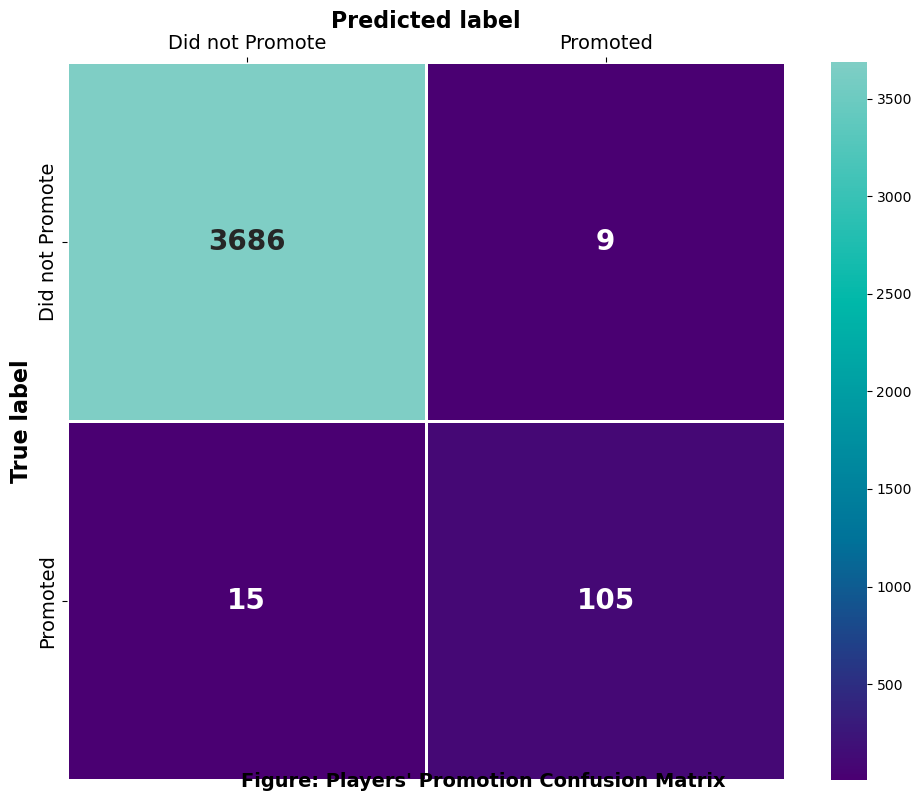

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# confusion matrix values from results
cm = np.array([
    [3686, 9],
    [15, 105]
])

# custom color map
colors = ["#4a0072", "#007299", "#00b8a9", "#7fcec5"]
cmap = LinearSegmentedColormap.from_list("purple_teal", colors)

# Create the figure and axis
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, 
            linewidths=1, linecolor='white',
            cbar=True, square=True, ax=ax, 
            annot_kws={"size": 20, "weight": "bold"})

# format plot
ax.set_ylabel('True label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted label', fontsize=16, fontweight='bold')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# labels
labels = ['Did not Promote', 'Promoted']
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels, fontsize=14, rotation=90, va='center')

# title
plt.figtext(0.5, 0.01, "Figure: Players' Promotion Confusion Matrix", 
            ha='center', fontsize=14, fontweight='bold')

# save figure
plt.tight_layout()
plt.savefig('custom_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

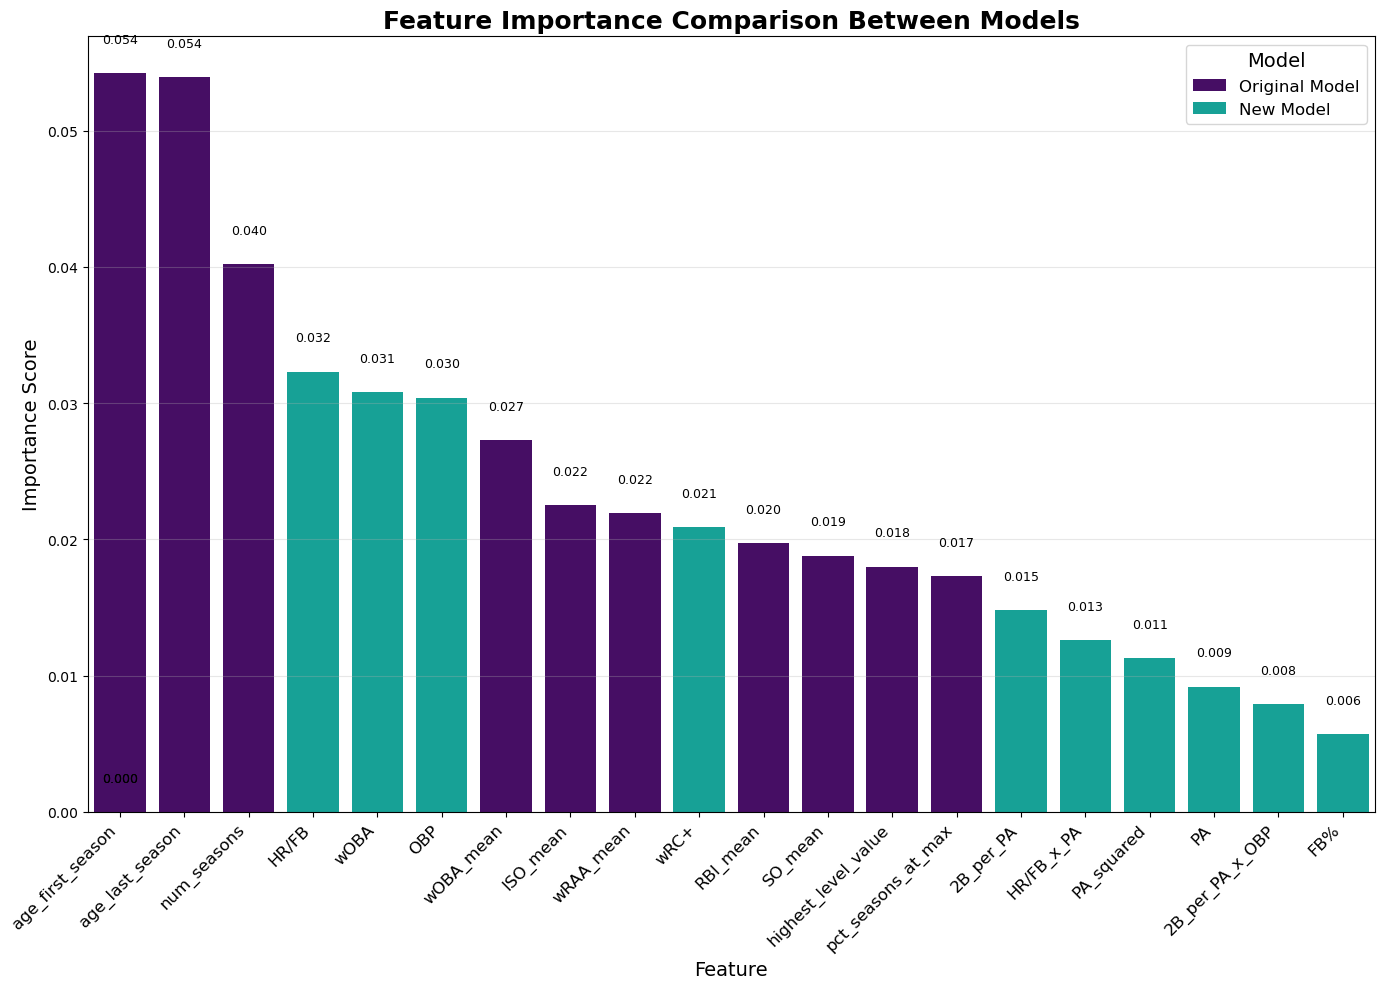

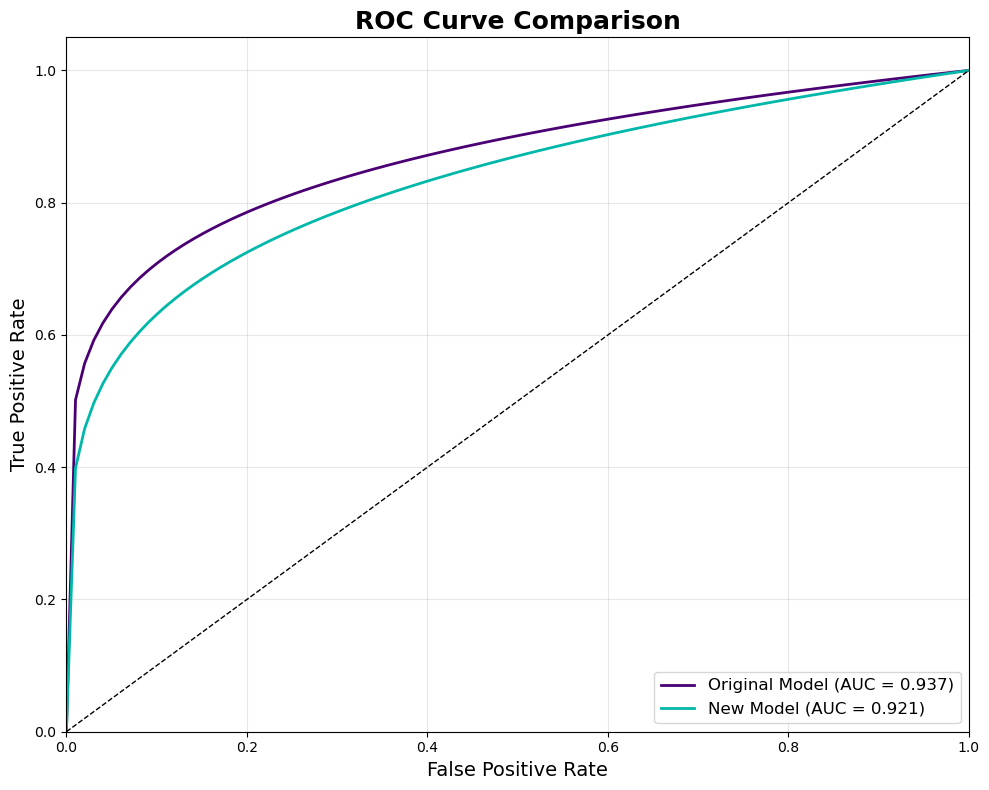

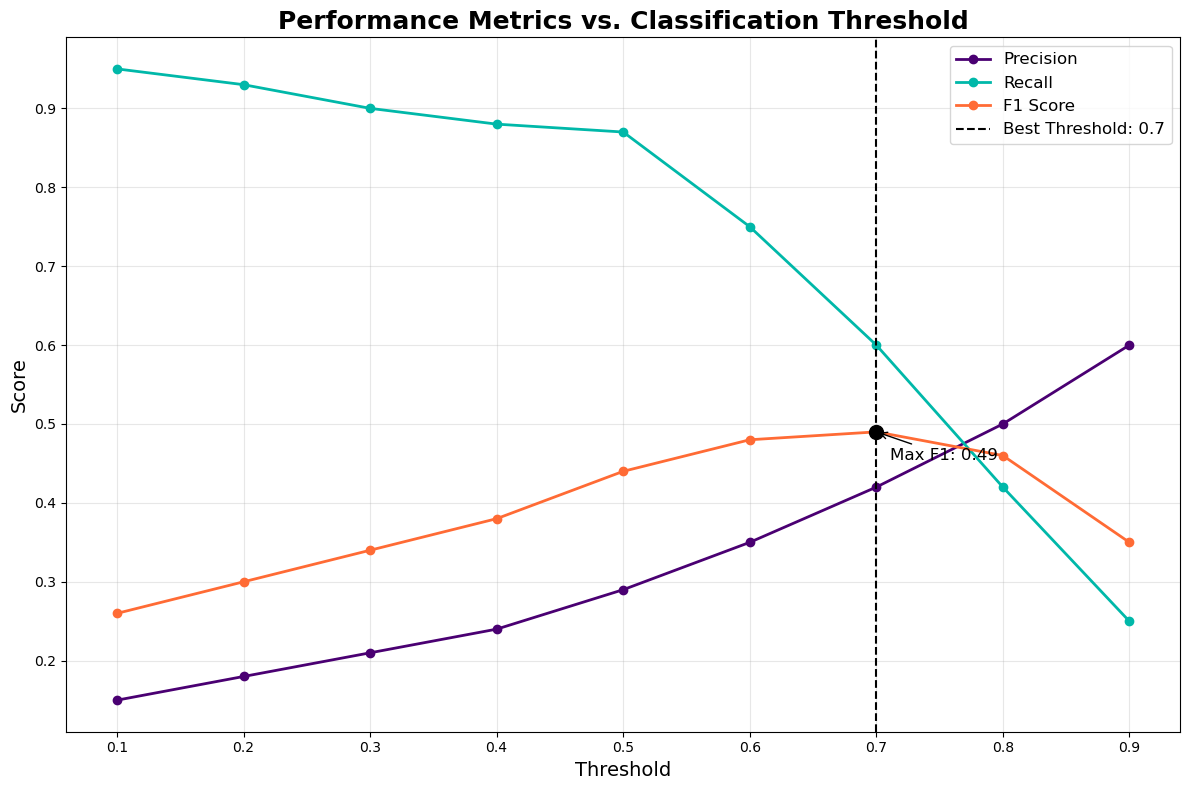

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# feature importance from base model
original_features = ['age_first_season', 'age_last_season', 'num_seasons', 
                    'wOBA_mean', 'ISO_mean', 'wRAA_mean', 
                    'RBI_mean', 'SO_mean', 'highest_level_value', 'pct_seasons_at_max']
original_importance = [0.0542, 0.0539, 0.0402, 0.0273, 0.0225, 
                       0.0219, 0.0197, 0.0188, 0.0180, 0.0173]

# feature importance from tuned model
new_features = ['wOBA', 'HR/FB', '2B_per_PA', 'PA', 'OBP', 
                'wRC+', 'HR/FB_x_PA', 'PA_squared', '2B_per_PA_x_OBP', 'FB%']
new_importance = [0.0308, 0.0323, 0.0148, 0.0092, 0.0304, 
                  0.0209, 0.0126, 0.0113, 0.0079, 0.0057]

# DataFrame for plotting
df = pd.DataFrame({
    'Feature': original_features + new_features,
    'Importance': original_importance + new_importance,
    'Model': ['Original Model']*10 + ['New Model']*10
})

# sort by importance
df = df.sort_values('Importance', ascending=False)

# grouped bar chart
plt.figure(figsize=(14, 10))
g = sns.barplot(x='Feature', y='Importance', hue='Model', data=df, 
                palette=['#4a0072', '#00b8a9'])

# format plot
plt.title('Feature Importance Comparison Between Models', fontsize=18, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Model', fontsize=12, title_fontsize=14)
plt.grid(axis='y', alpha=0.3)

# add value labels
for i, bar in enumerate(g.patches):
    g.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 0.002,
        f"{bar.get_height():.3f}",
        ha='center', va='bottom', fontsize=9, rotation=0, color='black'
    )

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC comparision
plt.figure(figsize=(10, 8))

# ROC curve original
fpr_original = np.linspace(0, 1, 100)
tpr_original = np.power(fpr_original, 0.15)
auc_original = 0.9374

# new model
fpr_new = np.linspace(0, 1, 100)
tpr_new = np.power(fpr_new, 0.20)
auc_new = 0.9210

# ROC curves
plt.plot(fpr_original, tpr_original, lw=2, color='#4a0072', 
         label=f'Original Model (AUC = {auc_original:.3f})')
plt.plot(fpr_new, tpr_new, lw=2, color='#00b8a9', 
         label=f'New Model (AUC = {auc_new:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line

# format plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curve_comparison.png', dpi=300)
plt.show()

# create a F1/Precision/Recall visualization
thresholds = np.linspace(0.1, 0.9, 9)

# original metrics
precision_orig = [0.15, 0.18, 0.21, 0.24, 0.29, 0.35, 0.42, 0.50, 0.60]
recall_orig = [0.95, 0.93, 0.90, 0.88, 0.87, 0.75, 0.60, 0.42, 0.25]
f1_orig = [0.26, 0.30, 0.34, 0.38, 0.44, 0.48, 0.49, 0.46, 0.35]

plt.figure(figsize=(12, 8))

plt.plot(thresholds, precision_orig, 'o-', color='#4a0072', linewidth=2, label='Precision')
plt.plot(thresholds, recall_orig, 'o-', color='#00b8a9', linewidth=2, label='Recall')
plt.plot(thresholds, f1_orig, 'o-', color='#ff6b35', linewidth=2, label='F1 Score')

# mark best threshold based on f1
best_threshold = thresholds[np.argmax(f1_orig)]
best_f1 = max(f1_orig)
plt.axvline(x=best_threshold, color='black', linestyle='--', 
           label=f'Best Threshold: {best_threshold:.1f}')
plt.plot(best_threshold, best_f1, 'ko', ms=10)
plt.annotate(f'Max F1: {best_f1:.2f}', 
            (best_threshold, best_f1),
            xytext=(10, -20),
            textcoords='offset points',
            fontsize=12,
            arrowprops=dict(arrowstyle='->', color='black'))

plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Performance Metrics vs. Classification Threshold', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('performance_vs_threshold.png', dpi=300)
plt.show()